In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error,r2_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/creditcard.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
creditcard=pd.read_csv(data_path)

In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditcard.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [9]:
creditcard['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
legit =creditcard[creditcard.Class== 0.0]
fraud =creditcard[creditcard.Class==1.0]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
creditcard.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)

In [17]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99333.727642,0.036546,0.022914,0.017307,-0.052799,0.037861,-0.000594,-0.069220,-0.007920,0.023258,...,-0.077956,0.035961,-0.024635,0.034769,-0.00436,0.014787,0.015883,0.011910,0.010579,67.657073
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
X= new_dataset.drop(columns='Class', axis=1)
Y= new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
281913  170526.0 -3.501973  1.086642  0.473423 -3.276477 -2.244596  0.715748   
266236  162245.0 -0.301710  0.360741  0.279757 -0.315757  1.544369  1.053127   
163331  115855.0  2.074837  0.204212 -1.676293  0.418942  0.452130 -0.886392   
146849   87919.0 -2.366589  2.232299 -0.931626 -3.001693  0.318147 -0.644920   
66306    51984.0  0.819470 -1.460581  0.687227 -0.869174 -1.564577 -0.048839   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

281913    0
266236    0
163331    0
146849    0
66306     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


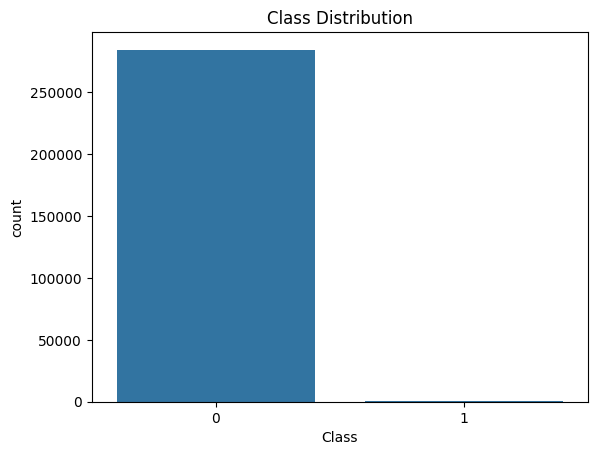

In [22]:
# Class distribution
sns.countplot(x='Class', data=creditcard)
plt.title('Class Distribution')
plt.show()


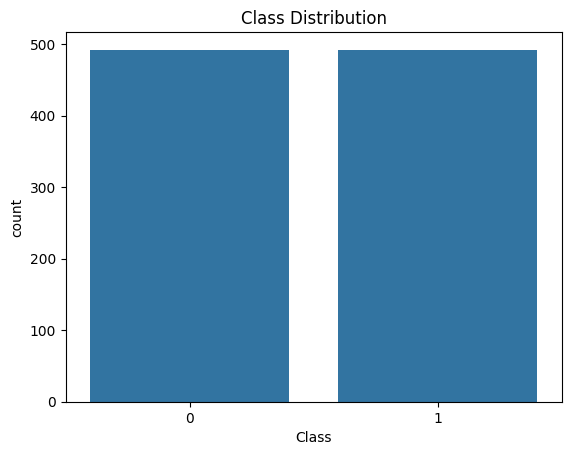

In [23]:
# Class distribution
sns.countplot(x='Class', data=new_dataset)
plt.title('Class Distribution')
plt.show()



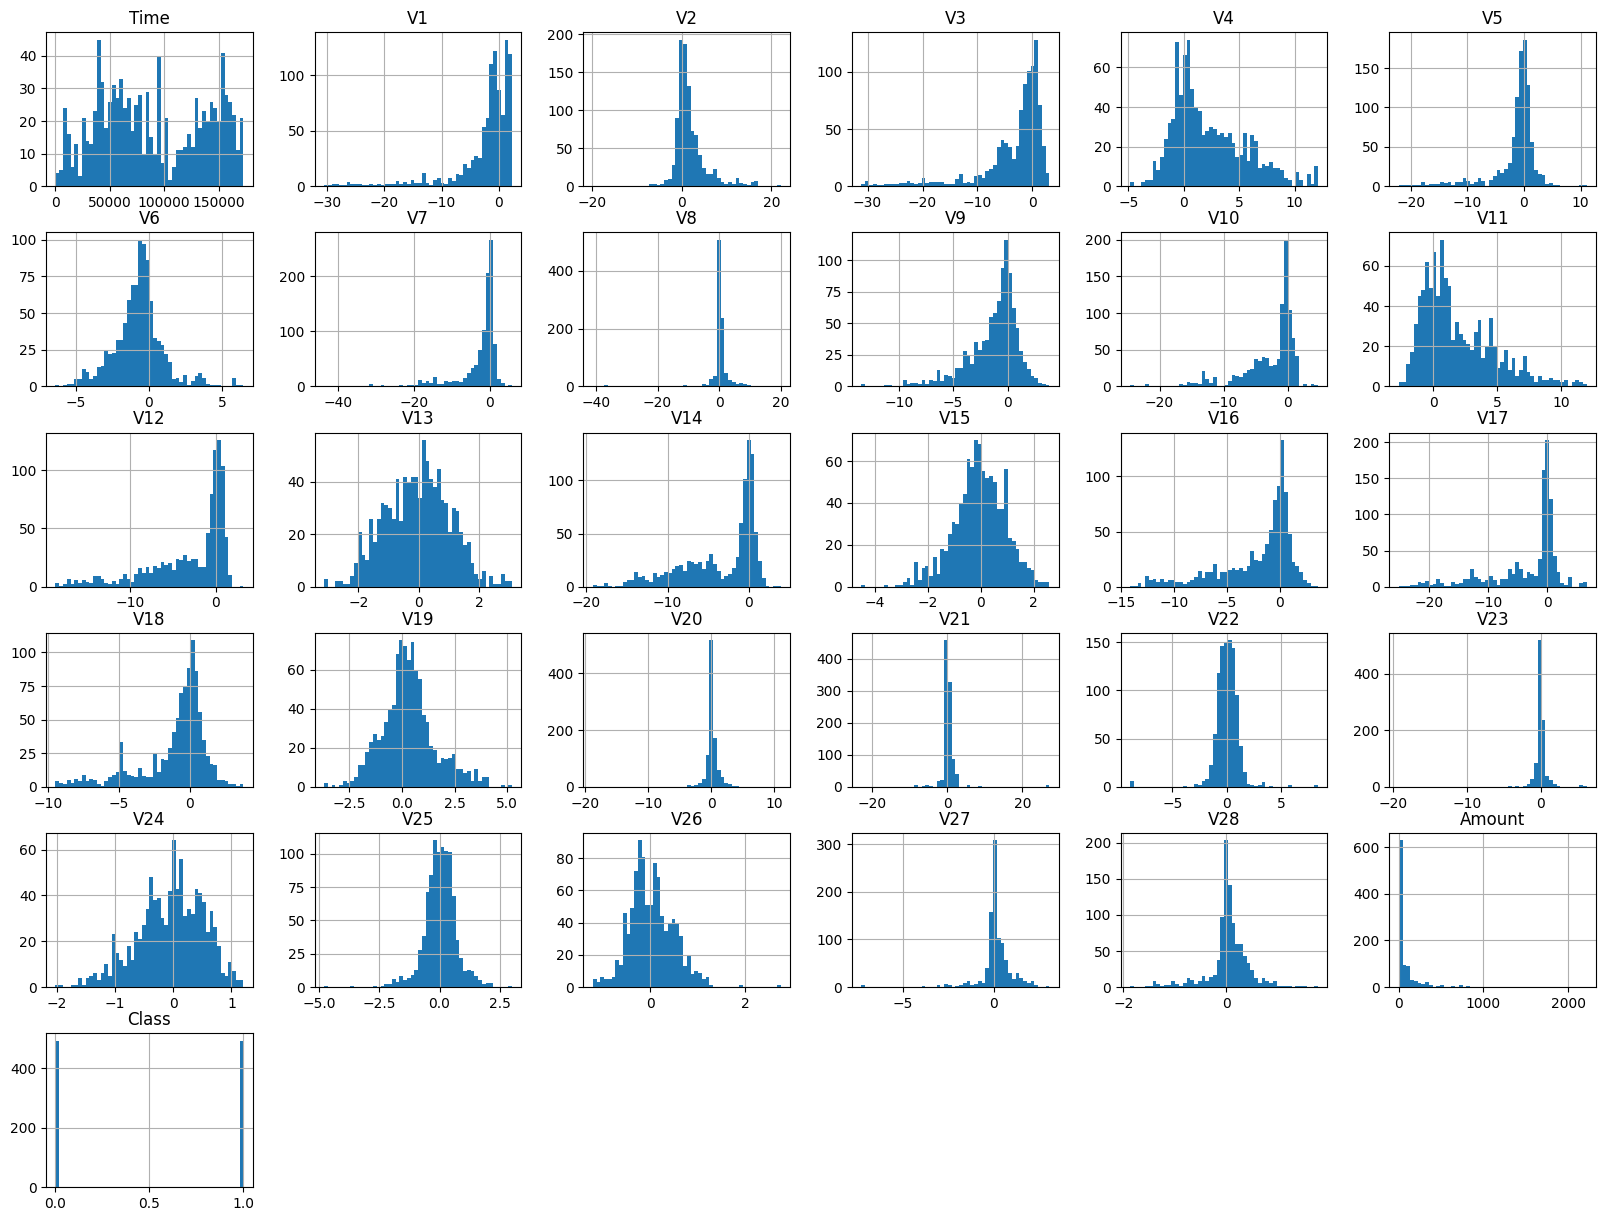

In [24]:
# Histograms of numerical features
new_dataset.hist(bins=50, figsize=(20, 15))
plt.show()


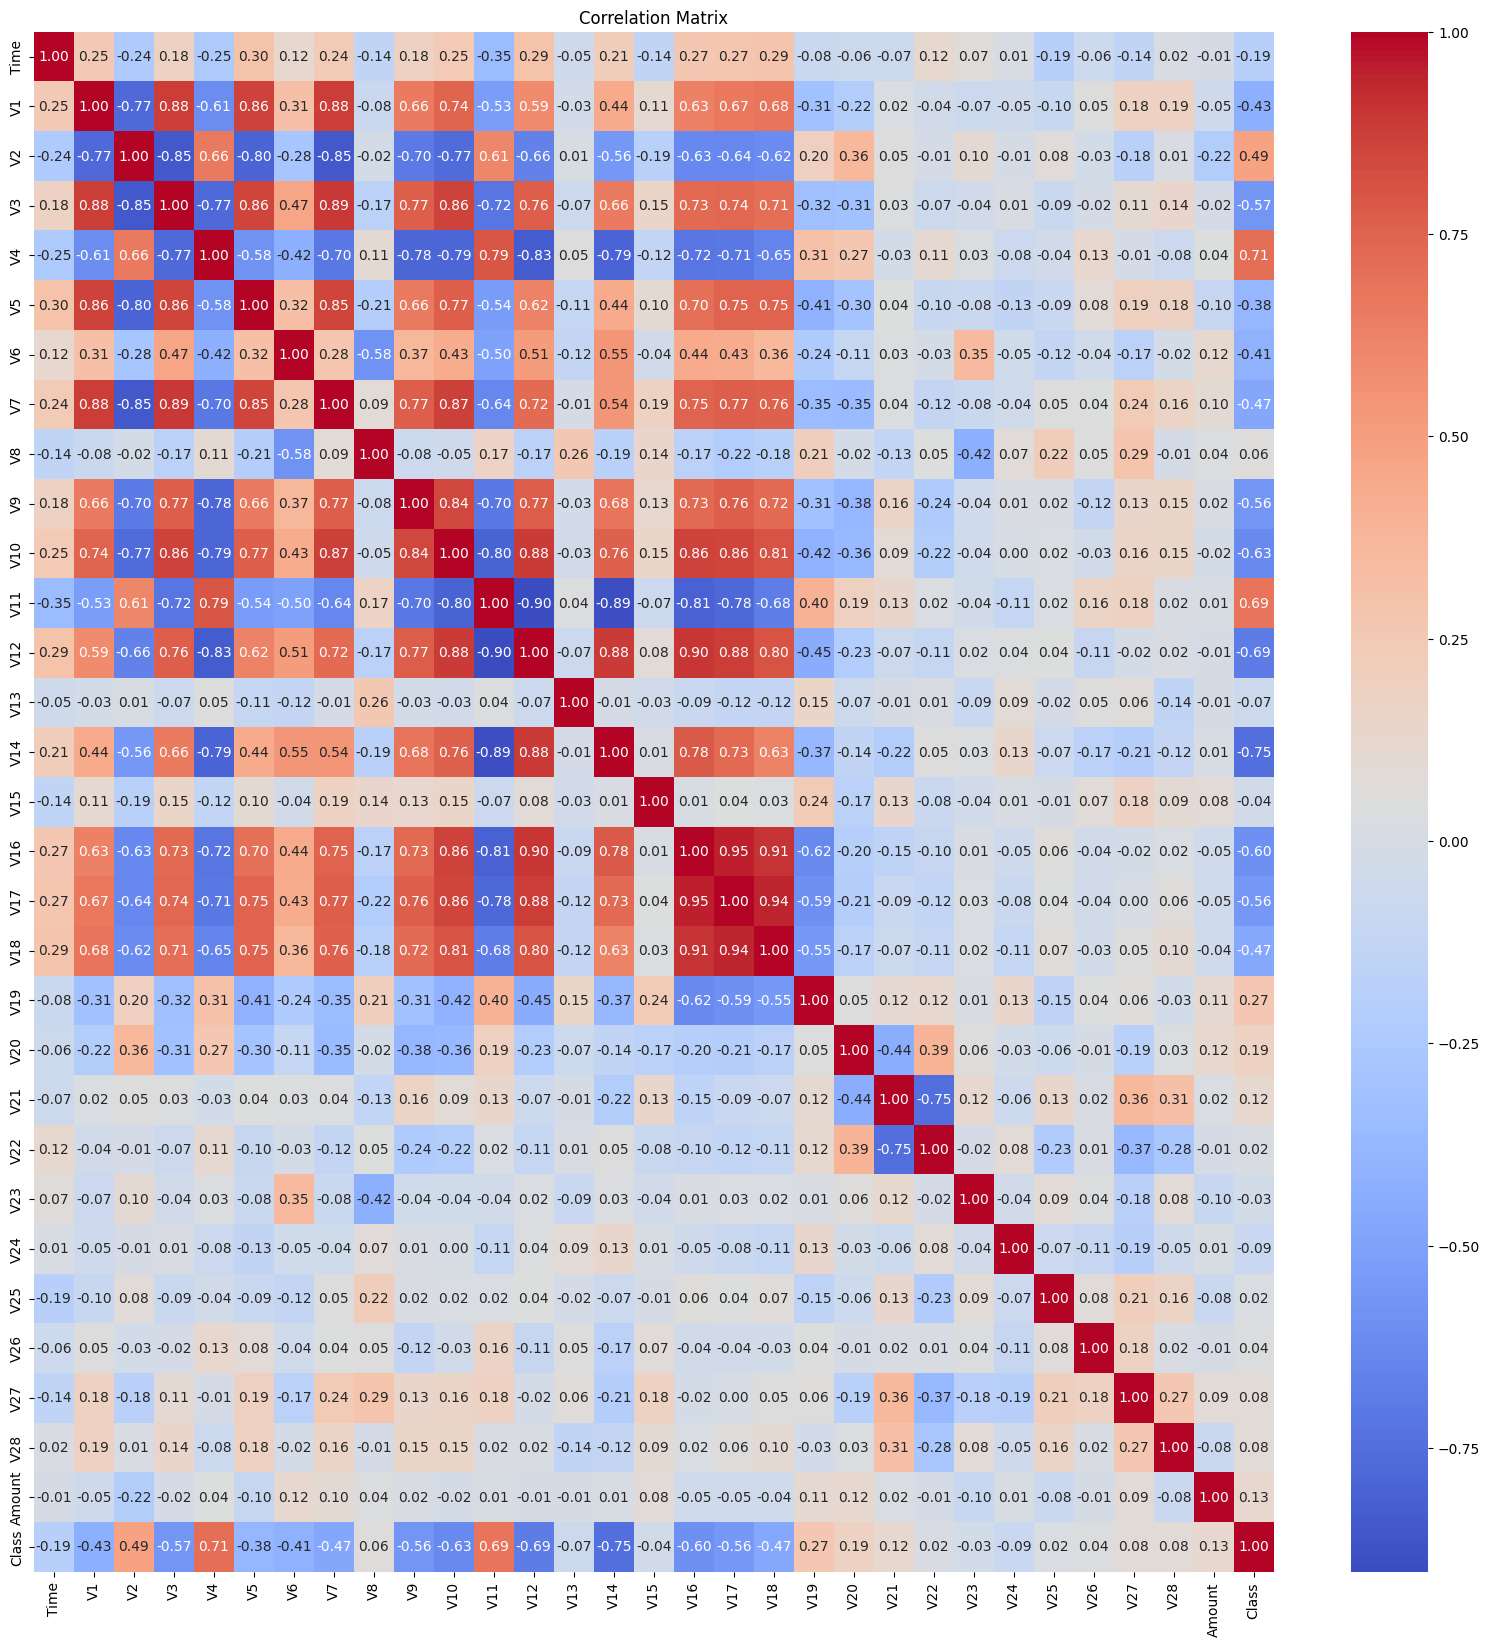

In [25]:
# Correlation matrix
corr_matrix = new_dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Split the data into training and testing sets
X = new_dataset.drop(columns=['Class'])
y = new_dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[147   3]
 [ 16 130]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       150
           1       0.98      0.89      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [28]:
# Train a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.048045270270270266
R2 Score: 0.8077838173515983


In [29]:
# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[148   2]
 [ 38 108]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       150
           1       0.98      0.74      0.84       146

    accuracy                           0.86       296
   macro avg       0.89      0.86      0.86       296
weighted avg       0.89      0.86      0.86       296



In [30]:
# Train a Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions
y_pred = bnb.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149   1]
 [ 24 122]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       150
           1       0.99      0.84      0.91       146

    accuracy                           0.92       296
   macro avg       0.93      0.91      0.91       296
weighted avg       0.93      0.92      0.91       296



In [31]:
# Train a Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[142   8]
 [ 17 129]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.94      0.88      0.91       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [32]:
y_test = y_test.astype(np.int64)
y_pred = y_pred.astype(np.int64)

In [33]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.08750594869001711
R2 Score: 0.6499122739532175


In [34]:
from sklearn.tree import DecisionTreeClassifier
# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137  13]
 [ 16 130]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       150
           1       0.91      0.89      0.90       146

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296



In [35]:
# Train a Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.09797297297297297
R2 Score: 0.6080365296803654


In [36]:
# Train a Support Vector Machine model
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59  91]
 [ 46 100]]
              precision    recall  f1-score   support

           0       0.56      0.39      0.46       150
           1       0.52      0.68      0.59       146

    accuracy                           0.54       296
   macro avg       0.54      0.54      0.53       296
weighted avg       0.54      0.54      0.53       296



In [37]:
param_grid = {'C': [0.1, 10 ],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf']}

# Instantiate the SVM classifier
svc = SVC(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=2, scoring='accuracy',verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions using the best model
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Evaluate the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  23.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  21.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  22.9s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  21.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  24.7s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  21.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

Mean Squared Error: 0.05079309514248293
R2 Score: 0.7967905103194619


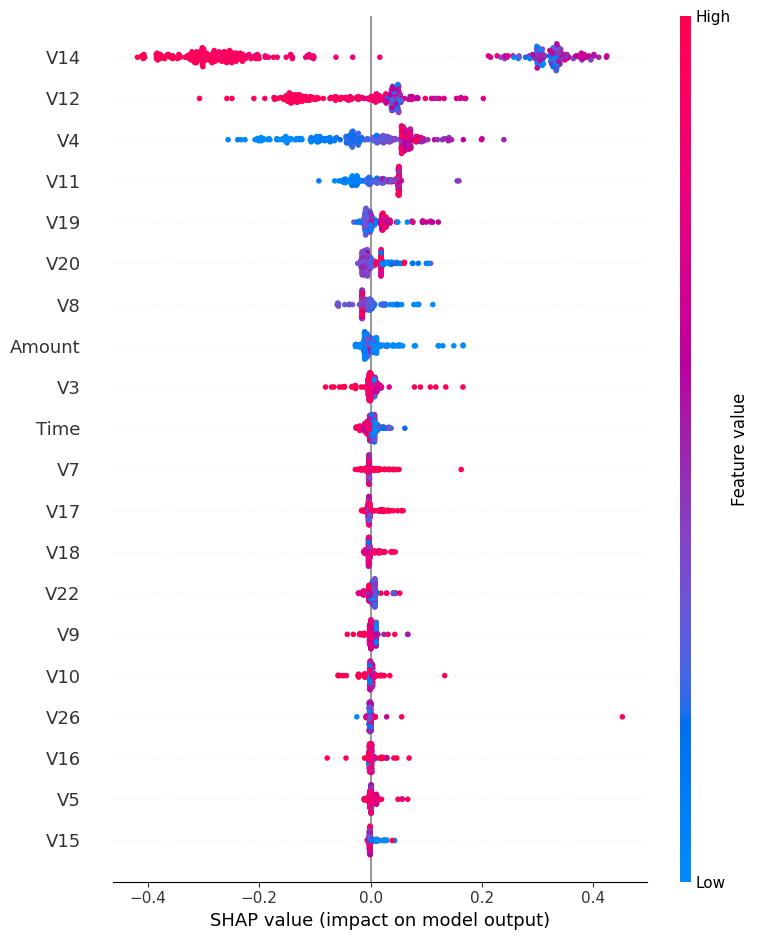

In [45]:
# Train a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [39]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))



Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.05079309514248293
R-squared Score: 0.7967905103194619


In [40]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


        importance
V14       0.740334
V4        0.051334
V12       0.023703
V10       0.020303
V8        0.016424
V11       0.012417
V7        0.010763
V17       0.009603
V19       0.008787
Amount    0.008531
V22       0.008430
V3        0.007855
V26       0.007487
V20       0.007249
V21       0.006371
Time      0.006011
V15       0.005788
V16       0.005656
V13       0.005535
V18       0.005408
V27       0.004656
V1        0.003945
V25       0.003920
V24       0.003891
V28       0.003576
V9        0.002724
V2        0.002550
V23       0.002541
V5        0.002465
V6        0.001744


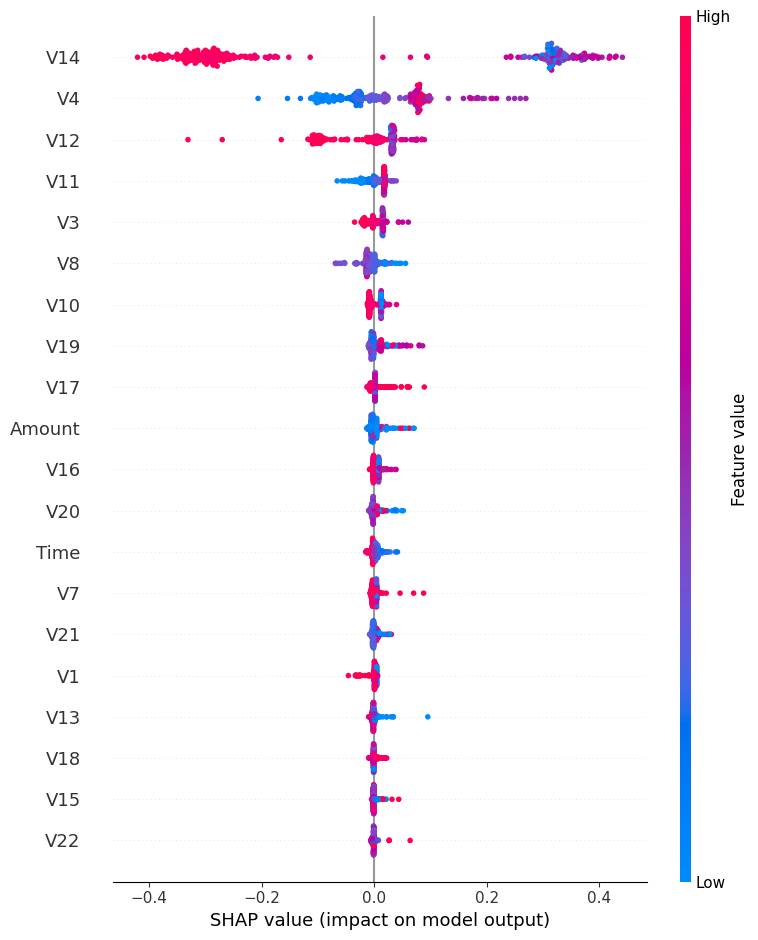

In [41]:
import shap

# Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# SHAP values
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


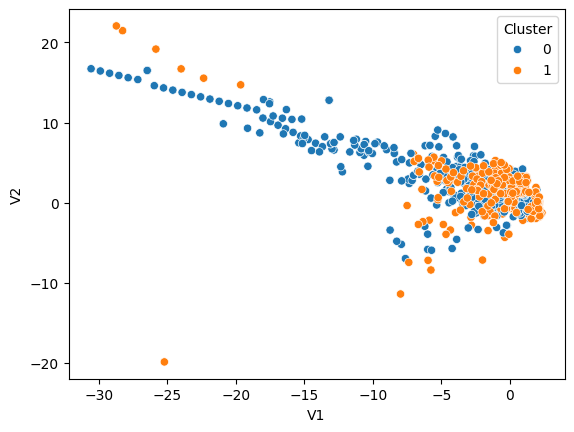

In [42]:
from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster results to the data
new_dataset['Cluster'] = clusters

# Visualize clusters
sns.scatterplot(x='V1', y='V2', hue='Cluster', data=new_dataset)
plt.show()


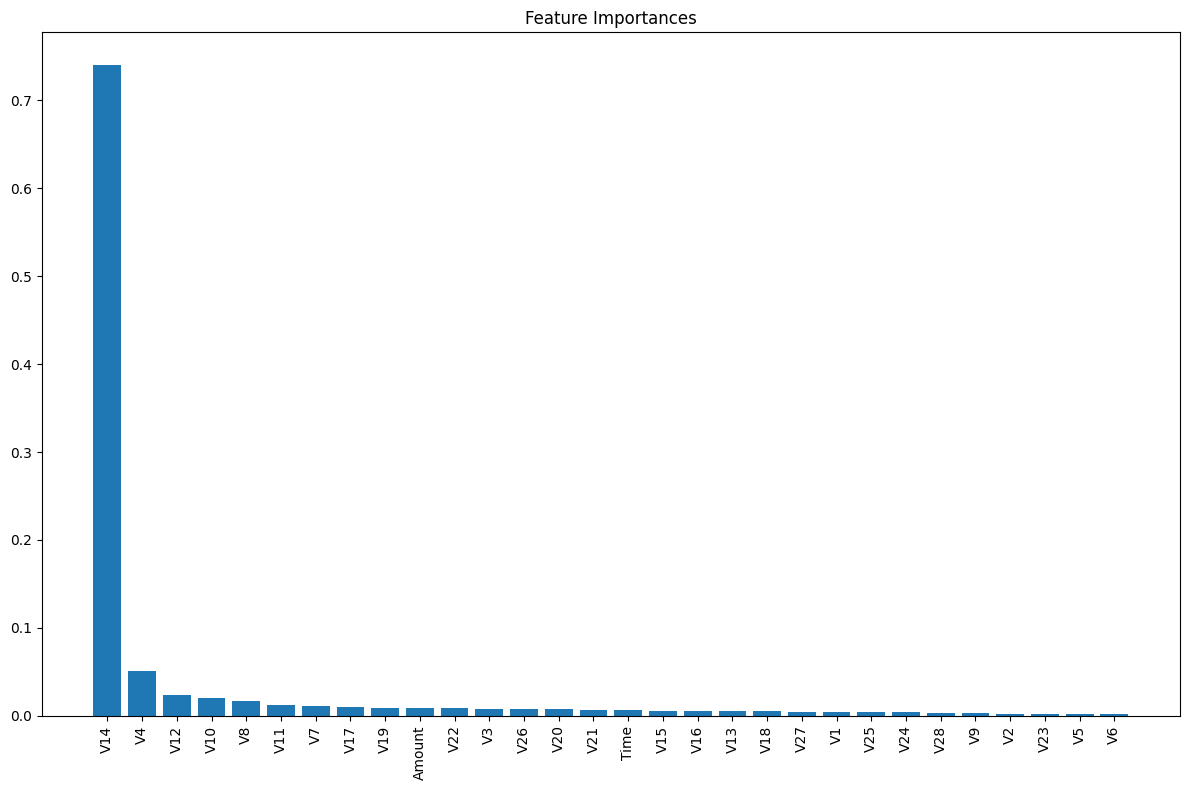

In [43]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### Best Model is **Random Forest Classifier**

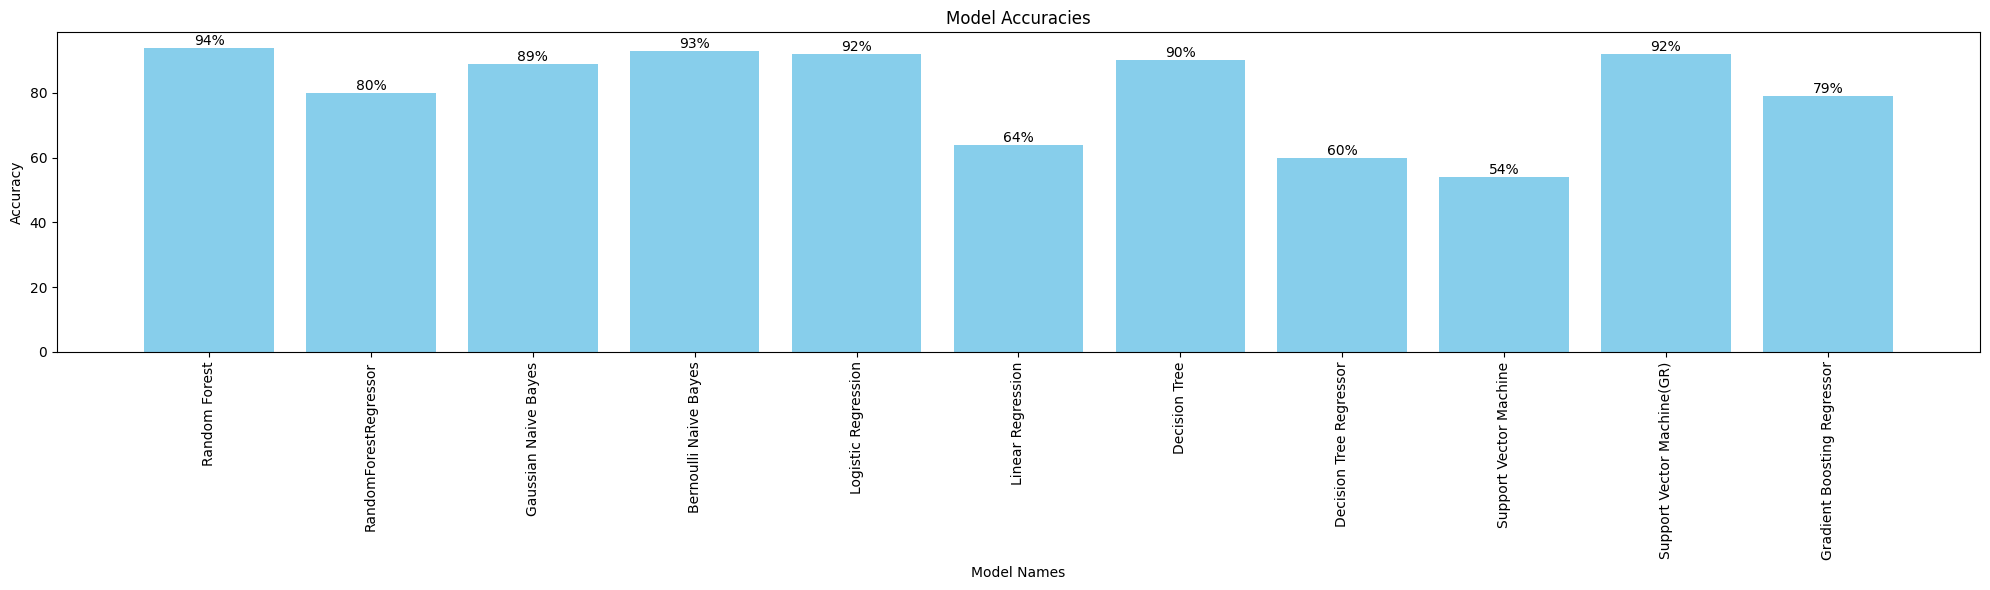

In [49]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Random Forest','RandomForestRegressor','Gaussian Naive Bayes','Bernoulli Naive Bayes',
              'Logistic Regression','Linear Regression','Decision Tree','Decision Tree Regressor',
              'Support Vector Machine','Support Vector Machine(GR)','Gradient Boosting Regressor']
values = [94,80,89,93,92,64,90,60,54,92,79]

# Create a bar chart
plt.figure(figsize=(20, 6))
bars = plt.bar(categories, values, color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Model Accuracies')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')

# Optionally, add text labels for each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{value}%',
             ha='center',
             va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
